In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import json
import dgl
import torch
import networkx as nx
import numpy as np

import sys
sys.path.append('..')
from unionfind import utils, gpu
import matplotlib.pyplot as plt

### Decoding on Repetition code

---
**Overview decoding effect (repetition code)**

In [2]:
with open('../bench/edge_weights.json', 'r') as f:
    weights = json.load(f)
d = 11
r = 10
g = utils.gene_rep_decoding_graph(d, r, **weights)
decoder = gpu.GPURepDecoder(g, d, r)

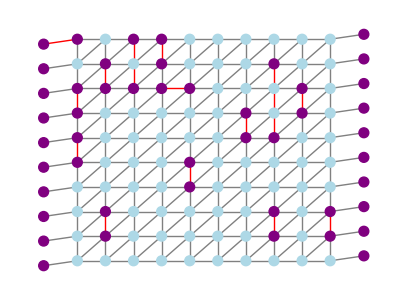

In [3]:
_ = decoder.visualize_decoding_graph()

In [4]:
decoder.decode()

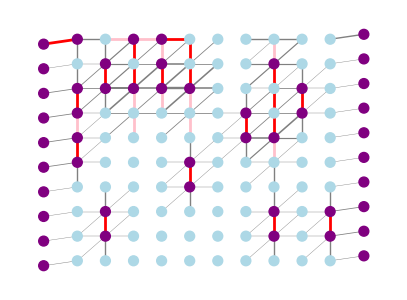

In [5]:
_ = decoder.visualize_result_graph()

In [6]:
decoder.guessed_error

Pauli('IIIZIIIIIIZ')

In [7]:
decoder.actual_error

Pauli('IIIZIIIIIIZ')

In [8]:
decoder.logical_error

False

---
**Fine-grained decoding analysis (repetition code)**

In [9]:
import unionfind.gpu
import importlib
importlib.reload(unionfind.gpu)
d = 11
r = 10
g = utils.gene_rep_decoding_graph(d, r, **weights)
decoder = unionfind.gpu.GPURepDecoder(g, d, r)


In [10]:
# decoder.decode()
# _ = decoder.visualize_intermediate_result_graph(True, False)

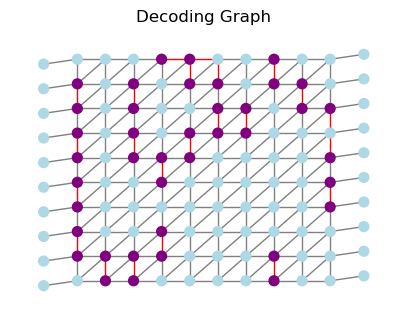

In [11]:
_ = decoder.visualize_decoding_graph()
plt.title('Decoding Graph')
plt.show()

In [12]:
num_epochs = 0

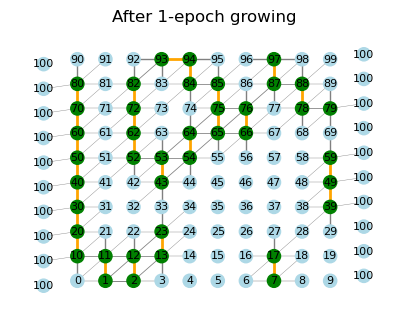

In [13]:
num_epochs += 1
decoder.grow()
_ = decoder.visualize_intermediate_result_graph()
plt.title('After {}-epoch growing'.format(num_epochs))
plt.show()

In [14]:
inner_epoch = 0

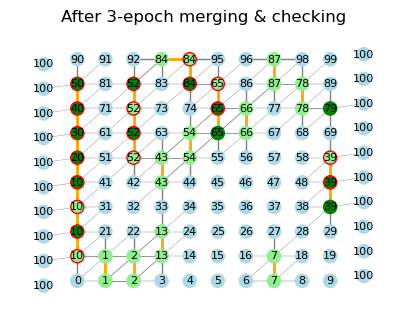

In [17]:
inner_epoch += 1
decoder.merge()
decoder.check()
if all(nx.get_node_attributes(decoder.decoding_graph, 'consistency').values()):
    print('Decoding finished!')
_ = decoder.visualize_intermediate_result_graph()
plt.title('After {}-epoch merging & checking'.format(inner_epoch))
plt.show()
# if there is not red-circle node, then enter the next growing stage

### Decoding on Surface code

---
**Overview decoding effect (surface code)**

In [33]:
d = 5
r = 3
p_data = 0.05
p_meas = 0.1
g = utils.gene_surf_decoding_graph(d, r, p_data, p_meas)
decoder = gpu.GPUSurfDecoder(g, d, r)

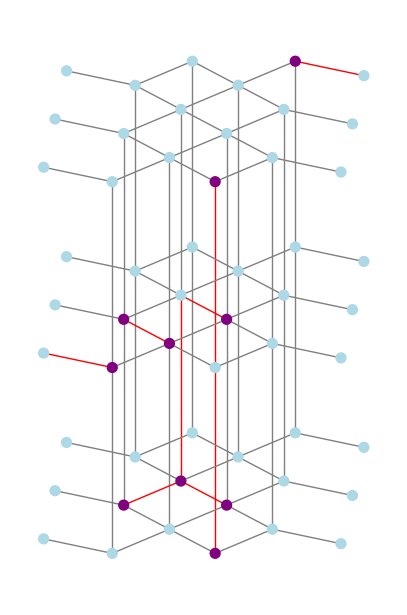

In [36]:
_ = decoder.visualize_decoding_graph()

In [37]:
decoder.decode()

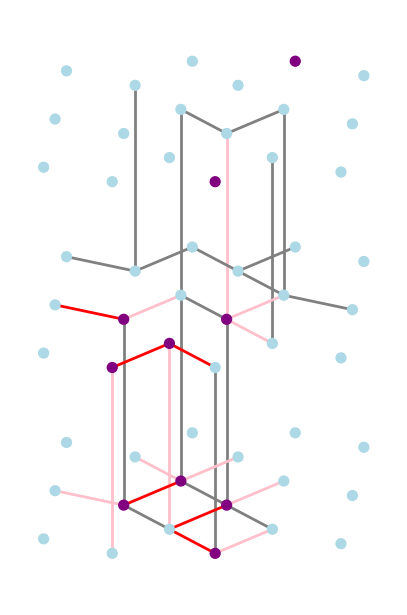

In [38]:
_ = decoder.visualize_result_graph()

In [39]:
decoder.guessed_error

Pauli('IZIIIIIIIIZZIIIIIIIIIIIIZ')

In [40]:
decoder.actual_error

Pauli('ZIIIIIZIIIIZIIIIIIIIIIIIZ')

In [41]:
decoder.logical_error

False

---
**Fine-grained decoding analysis (surface code)**

In [42]:
import unionfind.gpu
import importlib
importlib.reload(unionfind.gpu)
d = 5
r = 3
p_data = 0.05
p_meas = 0.1
g = utils.gene_surf_decoding_graph(d, r, p_data, p_meas)
decoder = unionfind.gpu.GPUSurfDecoder(g, d, r)


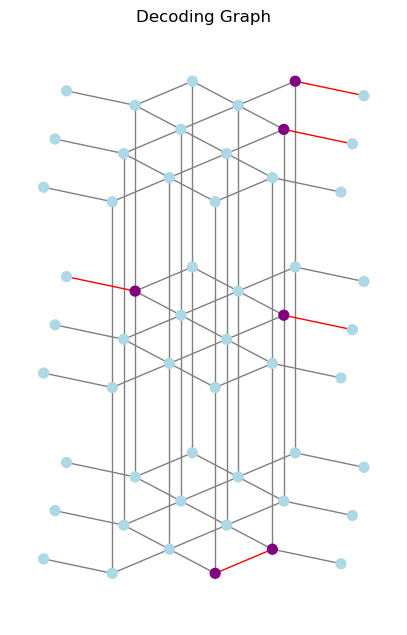

In [43]:
_ = decoder.visualize_decoding_graph()
plt.title('Decoding Graph')
plt.show()

In [44]:
num_epochs = 0

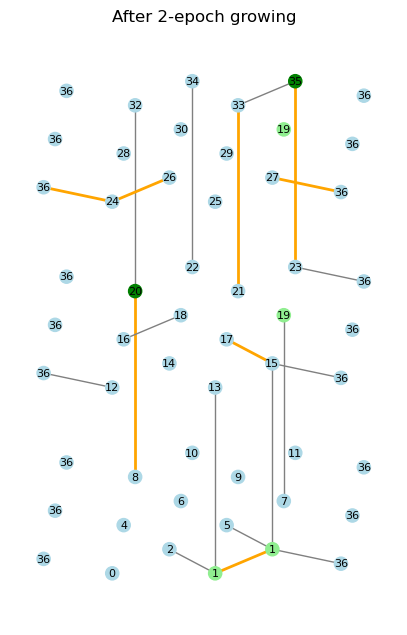

In [49]:
num_epochs += 1
decoder.grow()
_ = decoder.visualize_intermediate_result_graph()
plt.title('After {}-epoch growing'.format(num_epochs))
plt.show()

In [50]:
inner_epoch = 0

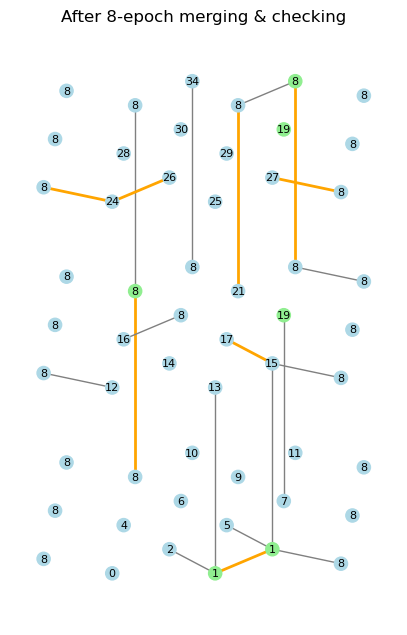

In [58]:
inner_epoch += 1
decoder.merge()
decoder.check()
if all(nx.get_node_attributes(decoder.decoding_graph, 'consistency').values()):
    print('Decoding finished!')
_ = decoder.visualize_intermediate_result_graph()
plt.title('After {}-epoch merging & checking'.format(inner_epoch))
plt.show()
# if there is not red-circle node, then enter the next growing stage